In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
dd = {"Position": [1, 2, 3, 3, 4, 4, 5],
      "University": ["1-UDLA", "2-PUCE", "3-ESPOL", "3-USFQ", "4-URAA", "4-UEES", "5-UCE"],
      "2015": [39, 99, 108, 126, 2, 33, 62],
      "2016": [55, 115, 215, 204, 5, 47, 103],
      "2017": [124, 192, 310, 349, 7, 84, 116],
      "2018": [153, 270, 380, 416, 29, 134, 157],
      "2019": [240, 301, 395, 457, 100, 173, 212],
      "2020": [331, 348, 426, 486, 210, 247, 234],
     }

df = pd.DataFrame(dd)
df.to_csv("scopus_ec.csv", index=False)
df

,Position,University,2015,2016,2017,2018,2019,2020
0,1,1-UDLA,39,55,124,153,240,331
1,2,2-PUCE,99,115,192,270,301,348
2,3,3-ESPOL,108,215,310,380,395,426
3,3,3-USFQ,126,204,349,416,457,486
4,4,4-URAA,2,5,7,29,100,210
5,4,4-UEES,33,47,84,134,173,247
6,5,5-UCE,62,103,116,157,212,234


In [ ]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"University","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"2016","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

![](https://www.statology.org/wp-content/uploads/2021/12/wideLong1-1-768x543.png)

In [ ]:
dfm = pd.melt(df, id_vars=["University", "Position"])
dfm["Width"] = 6 - dfm.Position
dfm["variable"] = pd.to_numeric(dfm["variable"])
dfm.rename(columns = {'variable':'Year', 'value':'Publications'}, inplace = True)

dfm.to_csv("scopus_ec_m.csv", index=False)

dfm

,University,Position,Year,Publications,Width
0,1-UDLA,1,2015,39,5
1,2-PUCE,2,2015,99,4
2,3-ESPOL,3,2015,108,3
3,3-USFQ,3,2015,126,3
4,4-URAA,4,2015,2,2
5,4-UEES,4,2015,33,2
6,5-UCE,5,2015,62,1
7,1-UDLA,1,2016,55,5
8,2-PUCE,2,2016,115,4
9,3-ESPOL,3,2016,215,3


In [ ]:
DeepnoteChart(dfm, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Year","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"Publications","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"University","scale":{"scheme":"tableau10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

Text(0, 0.5, 'Publications')

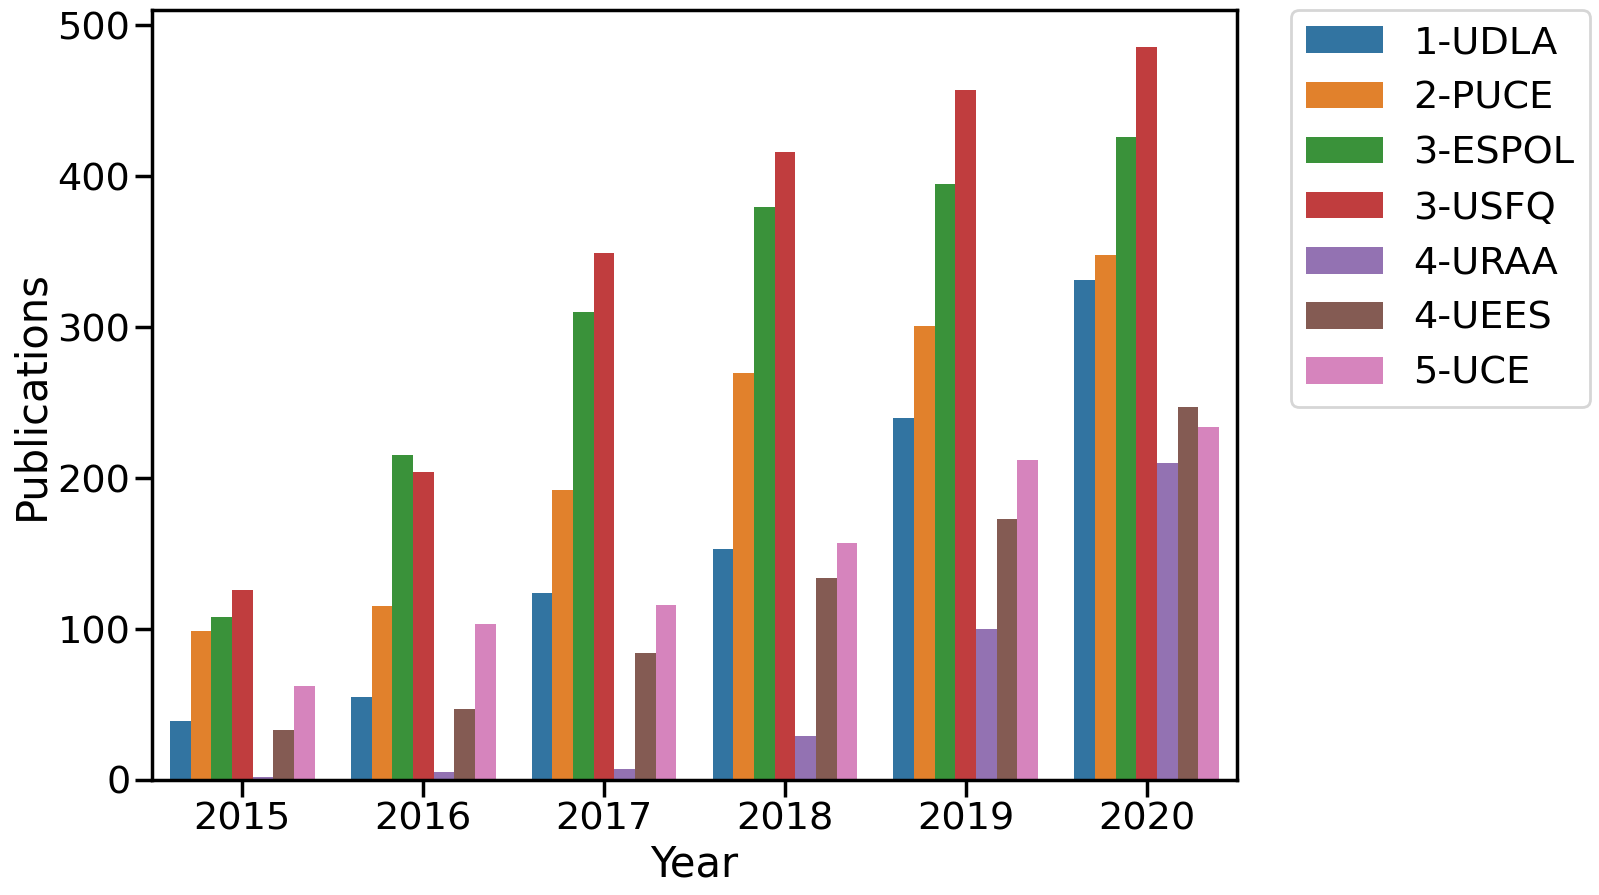

In [ ]:
matplotlib.rcParams.update({'font.size': 20})
sns.set_context("poster", font_scale=1.25)
plt.figure(figsize=(14,10))
g = sns.barplot(data=dfm, x="Year", y="Publications", 
             hue="University"#, palette="Paired"
               )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Year")
plt.ylabel("Publications")

Text(0, 0.5, 'Publications')

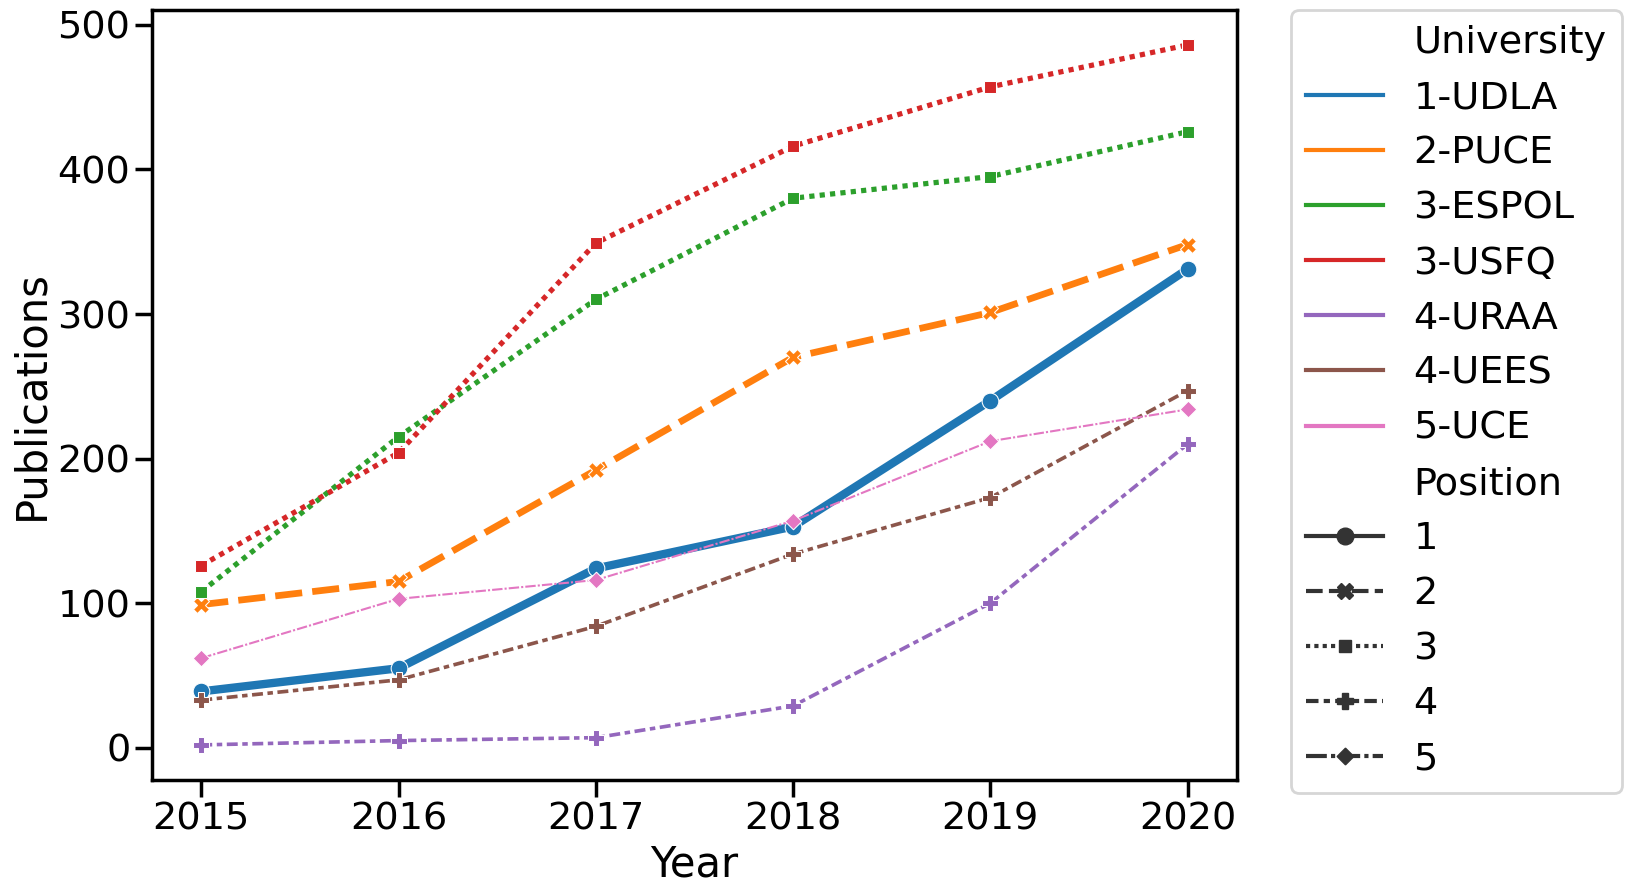

In [ ]:
matplotlib.rcParams.update({'font.size': 20})
sns.set_context("poster", font_scale=1.25)
plt.figure(figsize=(14,10))
g = sns.lineplot(data=dfm, x="Year", y="Publications", 
             hue="University", markers=True, dashes=True,
             style="Position", size="Width")
h,l = g.get_legend_handles_labels()
order = list(range(8))+list(range(14,20))
plt.legend([h[idx] for idx in order],[l[idx] for idx in order],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Year")
plt.ylabel("Publications")

Text(0, 0.5, 'Publications')

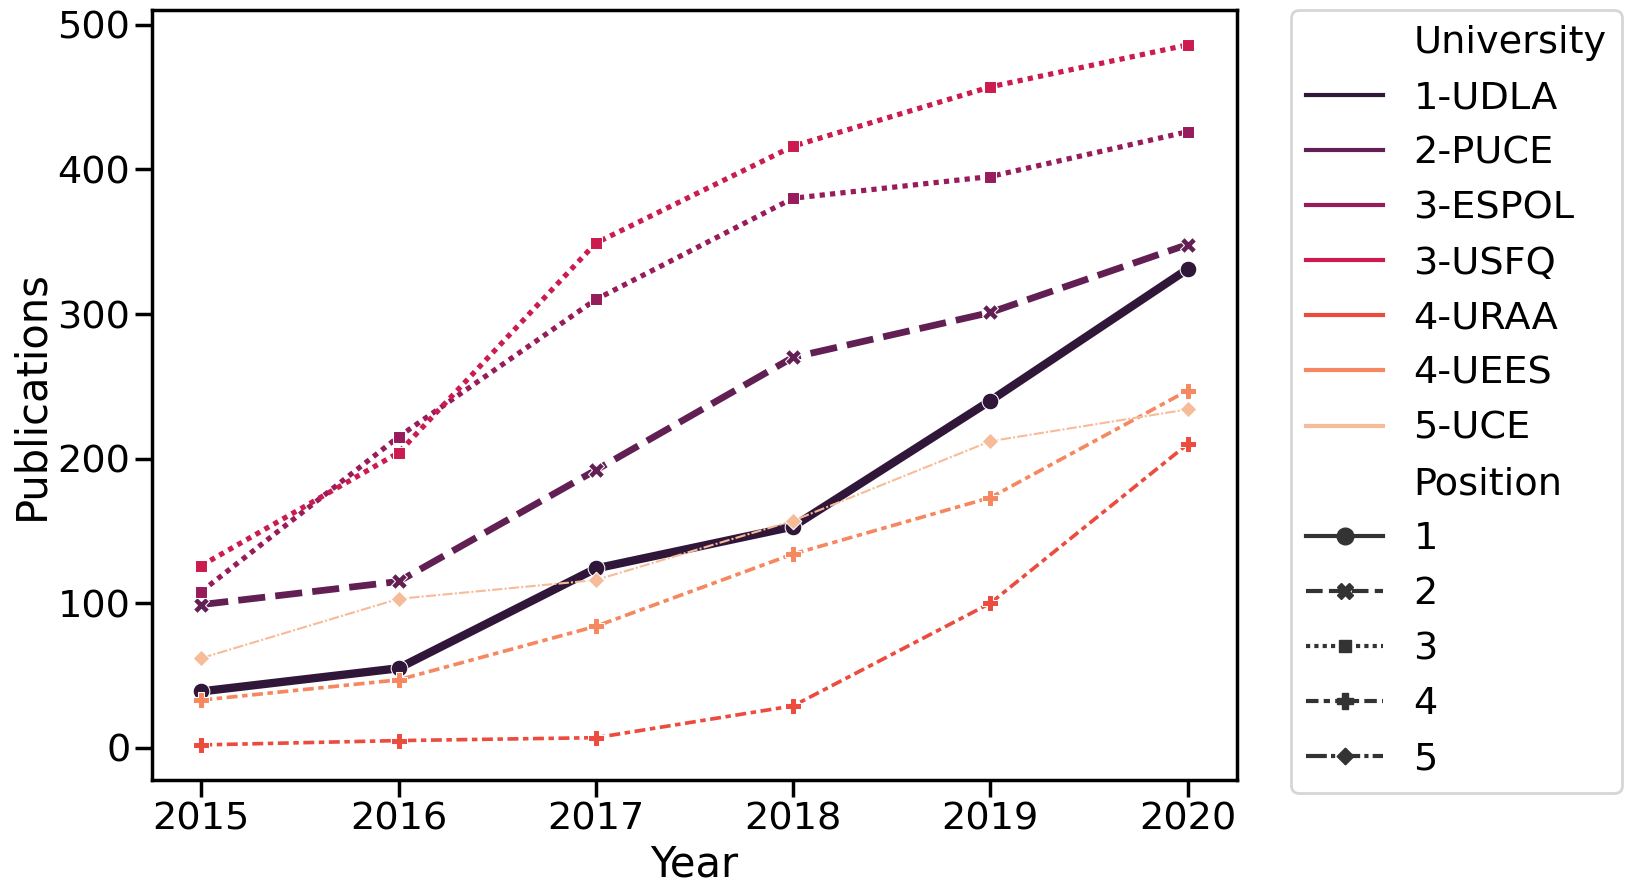

In [ ]:
matplotlib.rcParams.update({'font.size': 20})
sns.set_context("poster", font_scale=1.25)
plt.figure(figsize=(14,10))
g = sns.lineplot(data=dfm, x="Year", y="Publications", 
             hue="University", markers=True, dashes=True,
             style="Position", size="Width", palette="rocket")
h,l = g.get_legend_handles_labels()
order = list(range(8))+list(range(14,20))
plt.legend([h[idx] for idx in order],[l[idx] for idx in order],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Year")
plt.ylabel("Publications")

Text(0, 0.5, 'Publications')

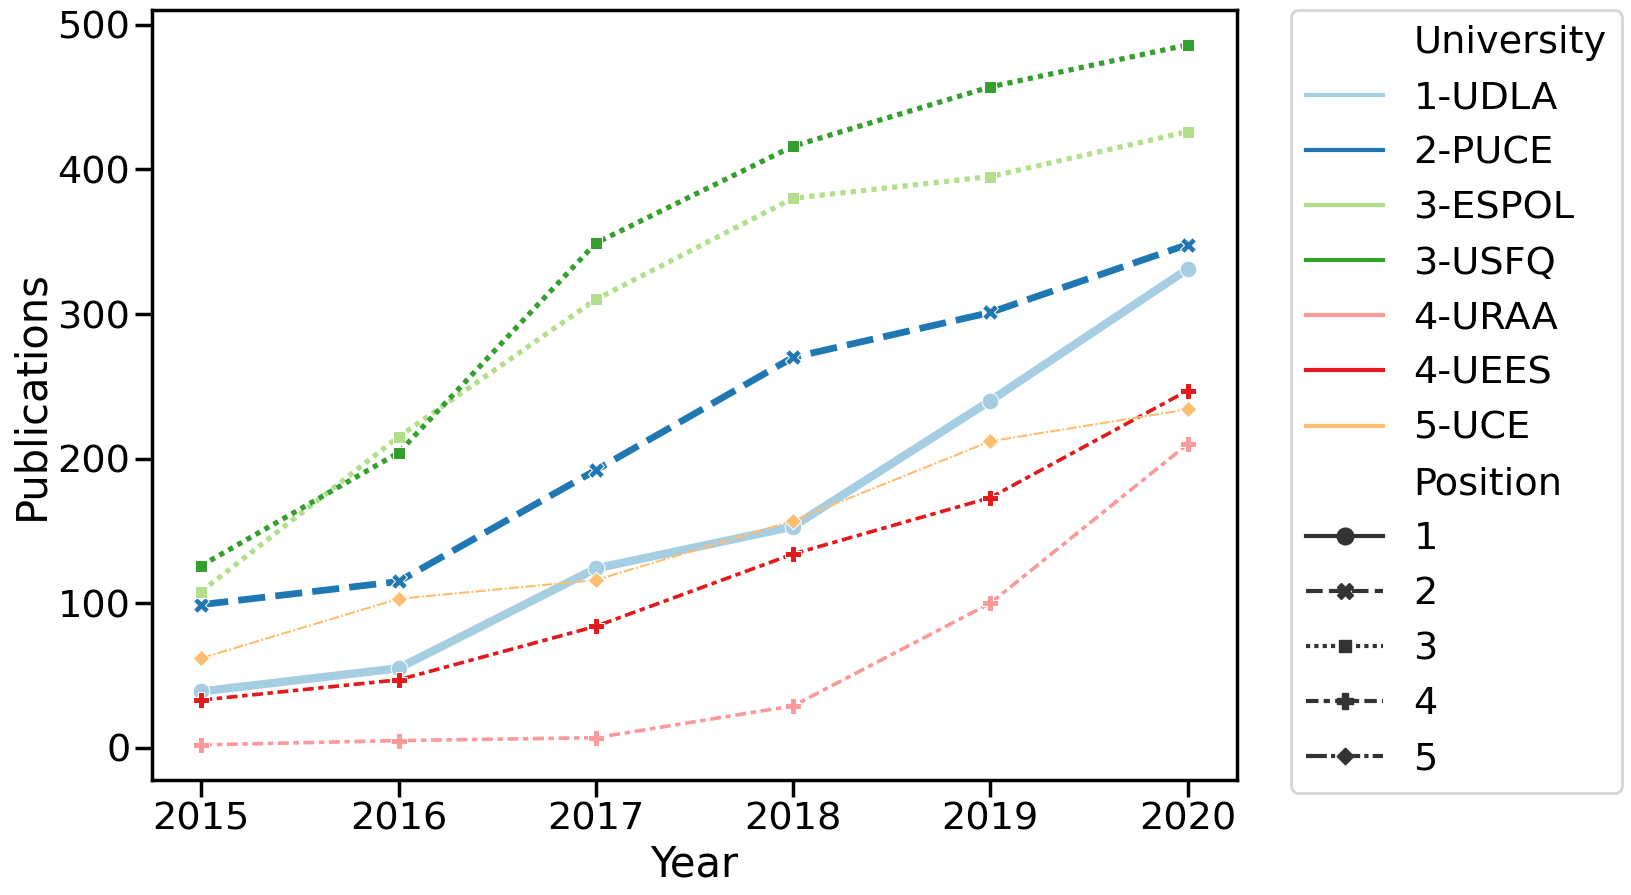

In [ ]:
matplotlib.rcParams.update({'font.size': 20})
sns.set_context("poster", font_scale=1.25)
plt.figure(figsize=(14,10))
g = sns.lineplot(data=dfm, x="Year", y="Publications", 
             hue="University", markers=True, dashes=True,
             style="Position", size="Width", palette="Paired")
h,l = g.get_legend_handles_labels()
order = list(range(8))+list(range(14,20))
plt.legend([h[idx] for idx in order],[l[idx] for idx in order],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Year")
plt.ylabel("Publications")

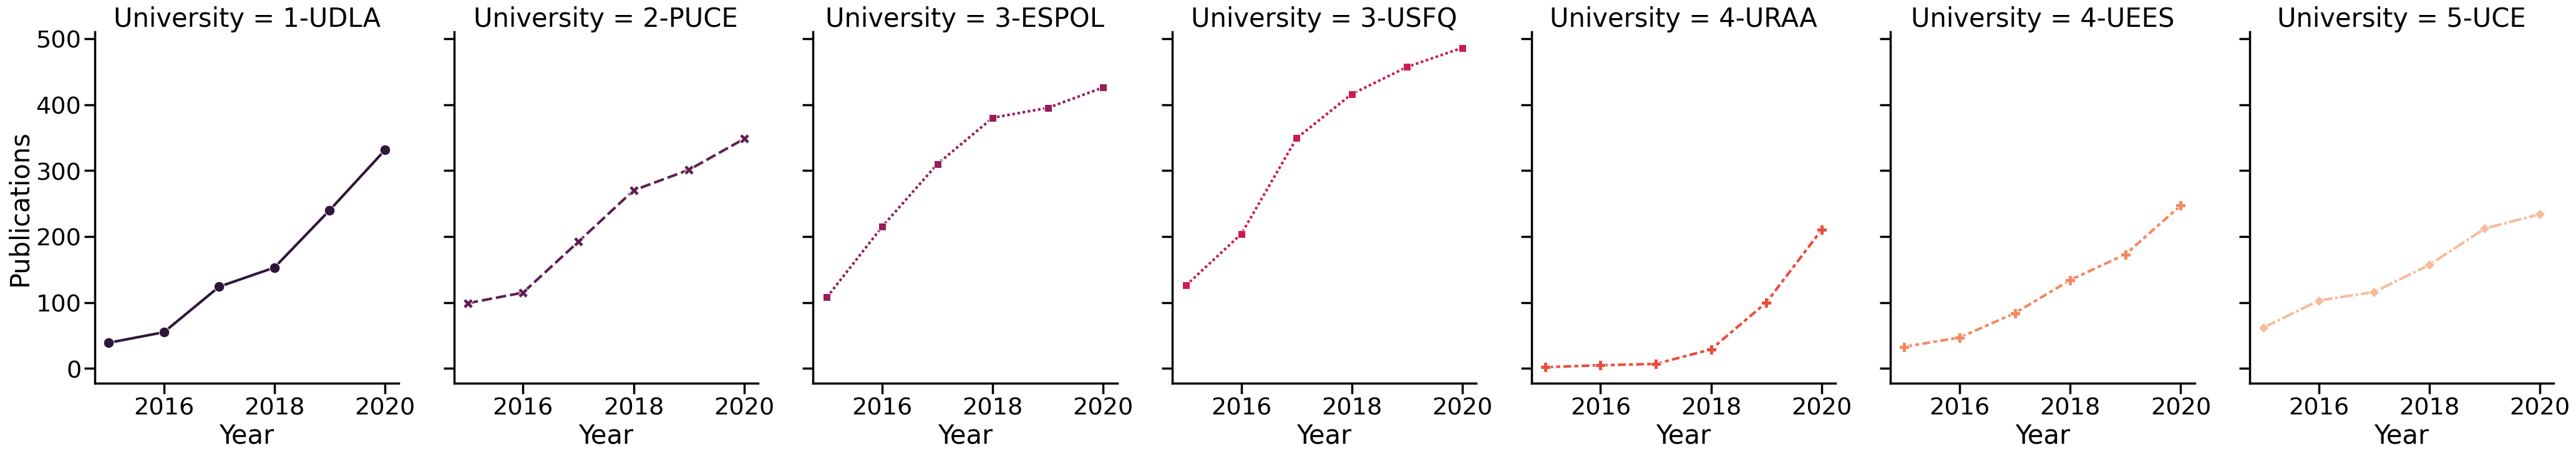

In [ ]:
g = sns.relplot(
    data=dfm,
    x="Year", y="Publications",
    hue="University", #size="Width", 
    col="University",
    kind="line", 
    palette="rocket", 
    #col_wrap=4,
    markers=True, dashes=True, style="Position",
    height=8, aspect=.75, facet_kws=dict(sharex=False), legend=False
)
#plt.savefig('figure1.pdf')

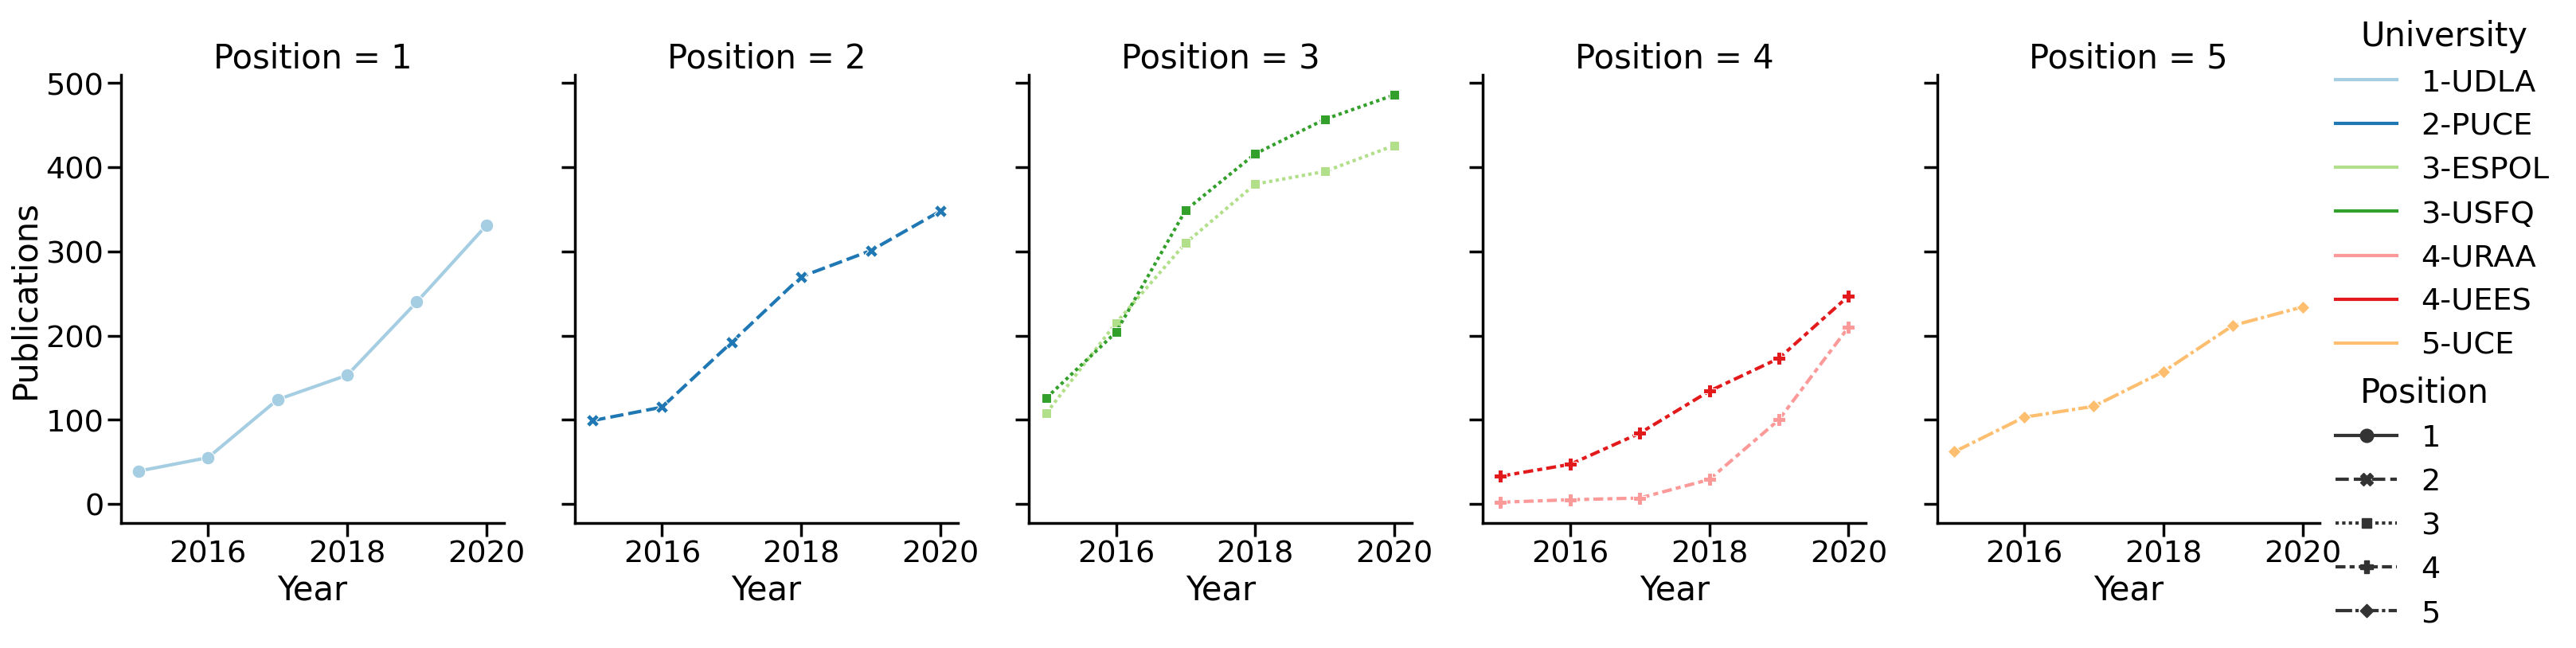

In [ ]:
g = sns.relplot(
    data=dfm,
    x="Year", y="Publications",
    hue="University", #size="Width", 
    col="Position",
    kind="line", 
    palette="Paired", 
    #col_wrap=4,
    markers=True, dashes=True, style="Position",
    height=8, aspect=.75, facet_kws=dict(sharex=False), legend=True
)
#plt.savefig('figure1.pdf')

Text(0.5, 1.0, 'Top Ecuadorian Univirsities (Scopus ranking)')

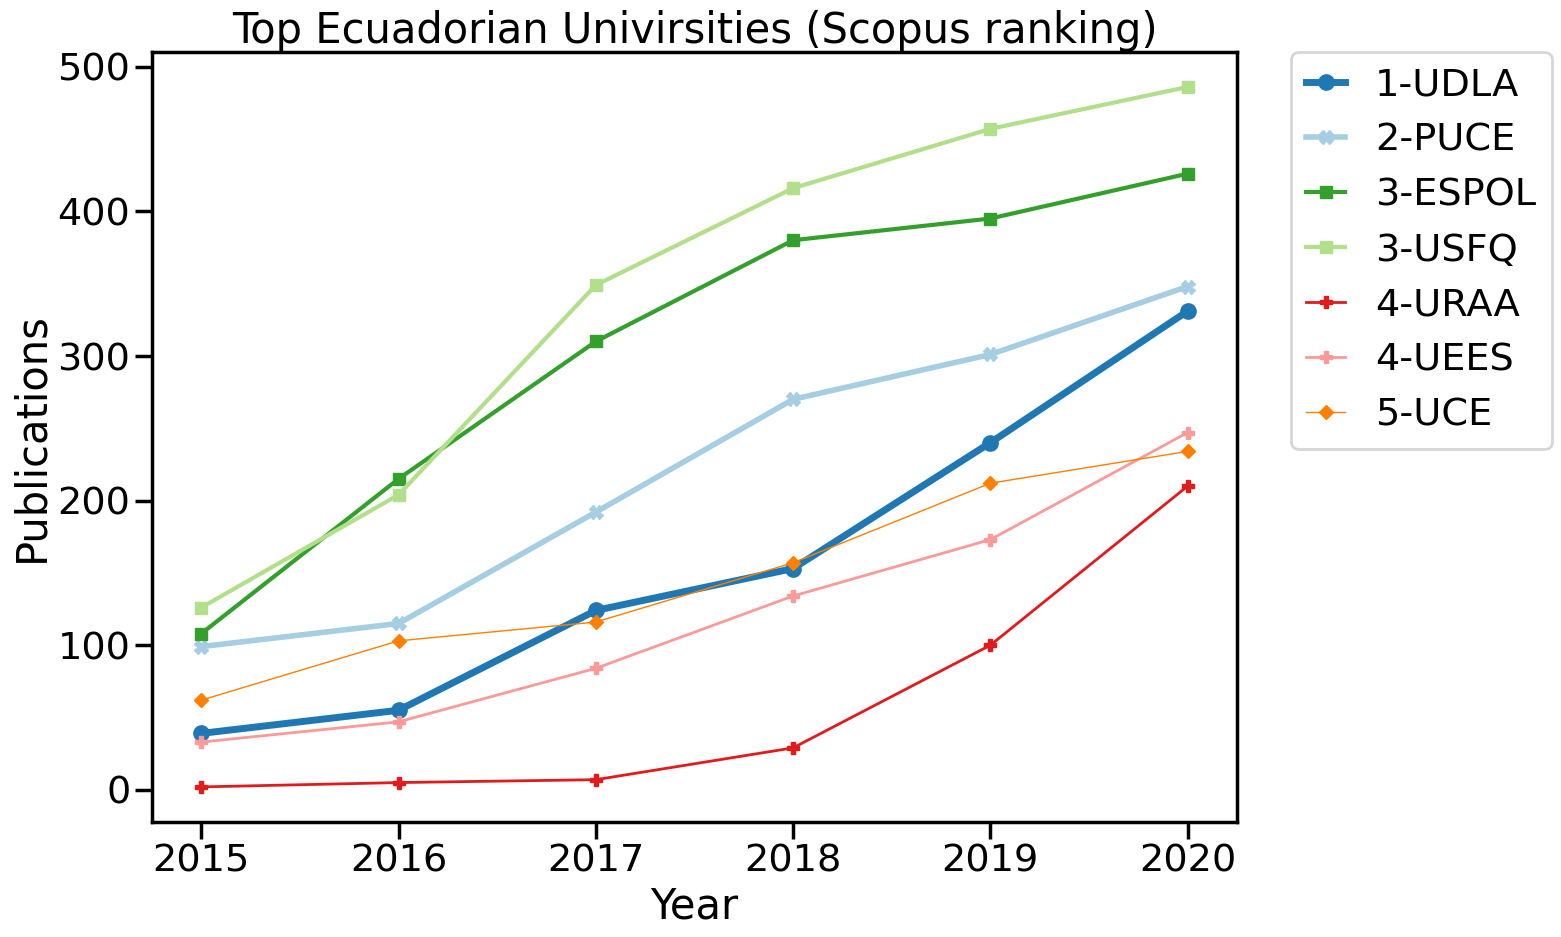

In [ ]:
matplotlib.rcParams.update({'font.size': 20})
sns.set_context("poster", font_scale=1.25)
colors = sns.color_palette("Paired", 8)
order = [(ci, ci-1) for ci in range(1,len(colors),2)]
colors = [colors[item] for sublist in order for item in sublist]
markers = {1: 'o', 2: 'X', 3: 's', 4: 'P', 5: 'D'}
plt.figure(figsize=(14,10))
for i in range(len(df)):
    plt.plot(df.iloc[i][2:], label=df.iloc[i][1], c=colors[i],
             linestyle="solid", marker=markers[df.iloc[i][0]],
             #linewidth=3, markersize=10, alpha=1.2-df.iloc[i][0]/df["Position"].max()
             linewidth=6-df.iloc[i][0], markersize=12-df.iloc[i][0]
            )

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handlelength=1)
plt.xlabel("Year")
plt.ylabel("Publications")
plt.title("Top Ecuadorian Univirsities (Scopus ranking)")

In [ ]:
a, b = 0, 0.3
alpha = a + ((df["Position"] - df["Position"].min()) * (b - a)) / (df["Position"].max()- df["Position"].min())
alpha

0    0.000
1    0.075
2    0.150
3    0.150
4    0.225
5    0.225
6    0.300
Name: Position, dtype: float64

Text(0.5, 1.0, 'Top Ecuadorian Univirsities (Scopus ranking)')

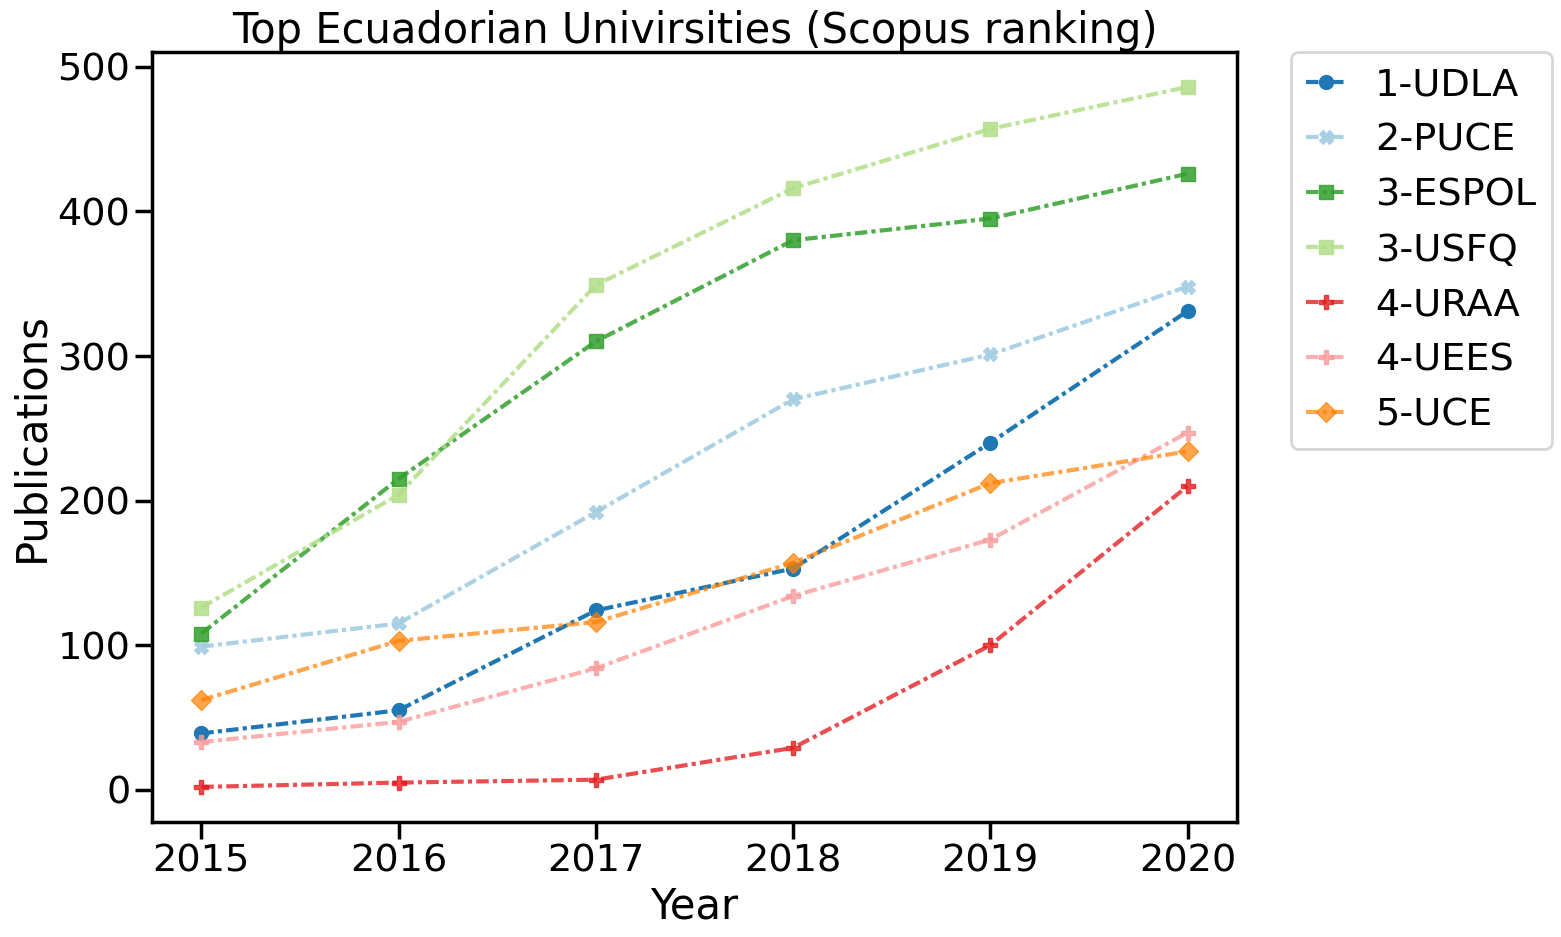

In [ ]:
matplotlib.rcParams.update({'font.size': 20})
sns.set_context("poster", font_scale=1.25)
colors = sns.color_palette("Paired", 8)
order = [(ci, ci-1) for ci in range(1,len(colors),2)]
colors = [colors[item] for sublist in order for item in sublist]
markers = {1: 'o', 2: 'X', 3: 's', 4: 'P', 5: 'D'}
plt.figure(figsize=(14,10))
for i in range(len(df)):
    plt.plot(df.iloc[i][2:], label=df.iloc[i][1], c=colors[i],
             linestyle = (0, (3, 1, 1, 1)),
             #linestyle = (1,(1,1)), 
             marker=markers[df.iloc[i][0]],
             linewidth=3, markersize=10, alpha=1-alpha[i]
             #linewidth=6-df.iloc[i][0], markersize=12-df.iloc[i][0]
            )

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handlelength=1)
plt.xlabel("Year")
plt.ylabel("Publications")
plt.title("Top Ecuadorian Univirsities (Scopus ranking)")

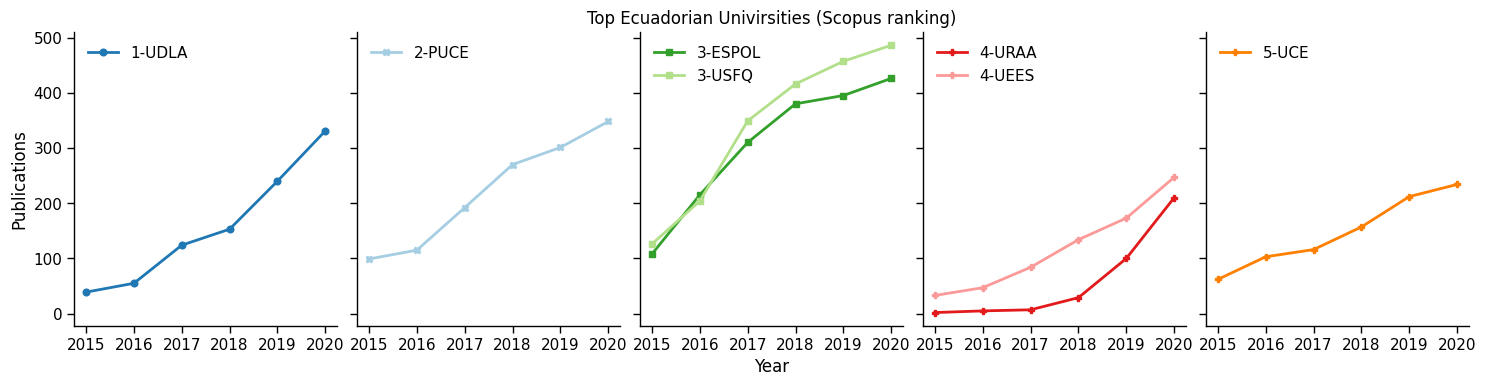

In [ ]:
colors = sns.color_palette("Paired", 8)
order = [(ci, ci-1) for ci in range(1,len(colors),2)]
colors = [colors[item] for sublist in order for item in sublist]
markers = {1: 'o', 2: 'X', 3: 's', 4: 'P', 5: 'D'}

matplotlib.rcParams.update({'font.size': 8})
sns.set_context("paper", font_scale=1.25)
f, axs = plt.subplots(1, 5, figsize=(18,3), sharey=True)
i = 0

ls = "solid"

axs[i].plot(df.iloc[i][2:], label=df.iloc[i][1], c=colors[i],
             linestyle=ls, marker=markers[df.iloc[i][0]],
             linewidth=2)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].set_ylabel("Publications")
axs[i].legend(loc=2, frameon=False)

i = 1
axs[i].plot(df.iloc[i][2:], label=df.iloc[i][1], c=colors[i],
             linestyle=ls, marker=markers[df.iloc[i][0]],
             linewidth=2)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].legend(loc=2, frameon=False)

i = 2
axs[i].plot(df.iloc[i][2:], label=df.iloc[i][1], c=colors[i],
             linestyle=ls, marker=markers[df.iloc[i][0]],
             linewidth=2)

axs[i].plot(df.iloc[i+1][2:], label=df.iloc[i+1][1], c=colors[i+1],
             linestyle=ls, marker=markers[df.iloc[i][0]],
             linewidth=2)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].legend(loc=2, frameon=False)
axs[i].set_xlabel("Year")
axs[i].set_title("Top Ecuadorian Univirsities (Scopus ranking)")

i = 3
axs[i].plot(df.iloc[i+1][2:], label=df.iloc[i+1][1], c=colors[i+1],
             linestyle=ls, marker=markers[df.iloc[i+1][0]],
             linewidth=2)

axs[i].plot(df.iloc[i+2][2:], label=df.iloc[i+2][1], c=colors[i+2],
             linestyle=ls, marker=markers[df.iloc[i+1][0]],
             linewidth=2)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].legend(loc=2, frameon=False)

i = 4
axs[i].plot(df.iloc[i+2][2:], label=df.iloc[i+2][1], c=colors[i+2],
             linestyle=ls, marker=markers[df.iloc[i+1][0]],
             linewidth=2)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].legend(loc=2, frameon=False)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.05, wspace=0.075)

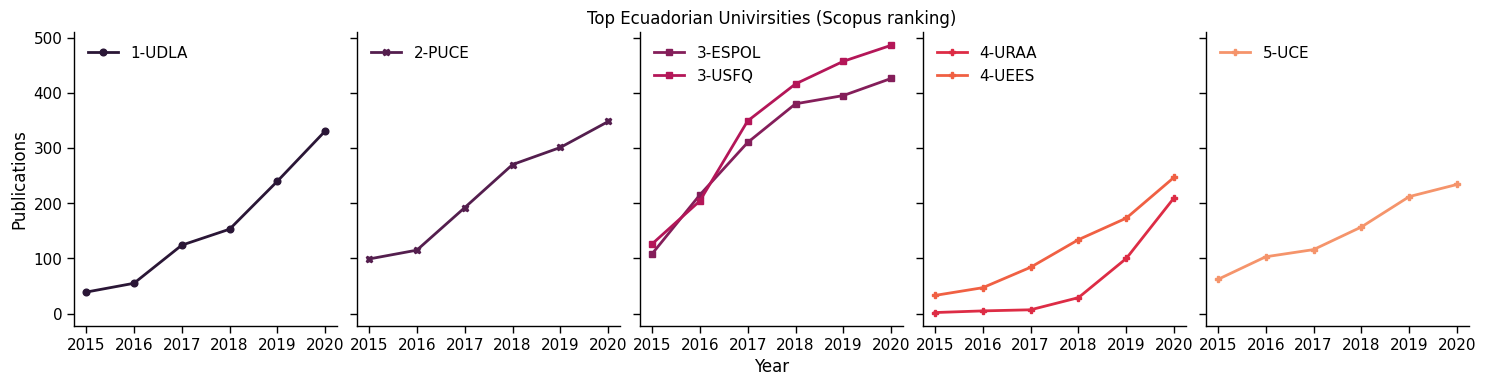

In [ ]:
colors = sns.color_palette("rocket", 8)
#order = [(ci, ci-1) for ci in range(1,len(colors),2)]
#colors = [colors[item] for sublist in order for item in sublist]
markers = {1: 'o', 2: 'X', 3: 's', 4: 'P', 5: 'D'}

matplotlib.rcParams.update({'font.size': 8})
sns.set_context("paper", font_scale=1.25)
f, axs = plt.subplots(1, 5, figsize=(18,3), sharey=True)
i = 0

ls = "solid"

axs[i].plot(df.iloc[i][2:], label=df.iloc[i][1], c=colors[i],
             linestyle=ls, marker=markers[df.iloc[i][0]],
             linewidth=2)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].set_ylabel("Publications")
axs[i].legend(loc=2, frameon=False)

i = 1
axs[i].plot(df.iloc[i][2:], label=df.iloc[i][1], c=colors[i],
             linestyle=ls, marker=markers[df.iloc[i][0]],
             linewidth=2)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].legend(loc=2, frameon=False)

i = 2
axs[i].plot(df.iloc[i][2:], label=df.iloc[i][1], c=colors[i],
             linestyle=ls, marker=markers[df.iloc[i][0]],
             linewidth=2)

axs[i].plot(df.iloc[i+1][2:], label=df.iloc[i+1][1], c=colors[i+1],
             linestyle=ls, marker=markers[df.iloc[i][0]],
             linewidth=2)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].legend(loc=2, frameon=False)
axs[i].set_xlabel("Year")
axs[i].set_title("Top Ecuadorian Univirsities (Scopus ranking)")

i = 3
axs[i].plot(df.iloc[i+1][2:], label=df.iloc[i+1][1], c=colors[i+1],
             linestyle=ls, marker=markers[df.iloc[i+1][0]],
             linewidth=2)

axs[i].plot(df.iloc[i+2][2:], label=df.iloc[i+2][1], c=colors[i+2],
             linestyle=ls, marker=markers[df.iloc[i+1][0]],
             linewidth=2)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].legend(loc=2, frameon=False)

i = 4
axs[i].plot(df.iloc[i+2][2:], label=df.iloc[i+2][1], c=colors[i+2],
             linestyle=ls, marker=markers[df.iloc[i+1][0]],
             linewidth=2)
axs[i].spines['top'].set_visible(False)
axs[i].spines['right'].set_visible(False)
axs[i].legend(loc=2, frameon=False)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.05, wspace=0.075)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>